

# Project: Investigate a Dataset (TMDB-MOVIES PROJECT)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb),
including user ratings and revenue. The dataset includes 21 columns.

In [152]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# importing 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [153]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [154]:
# to investigate how many columns and rows
# see which column has a missing data
# see data type

# srr information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [155]:
# see statistics things
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [156]:
# see dimension of dataset
df.shape

(10866, 21)

In [157]:
# to see the data type of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [158]:
# number of missing value
df.isnull().any(axis=1).sum()

8874

###### the dataset has 10866 rows and 21 columns
###### many columns are missing data

In [159]:
# check number of duplicated rows
df.duplicated().sum()

1

# Data Cleaning 


In [160]:
# delete columns that i believe i dont need it to investigate dataset

# list of columns will be deleted
col_del=[ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'release_date', 'tagline', 'popularity']

# deleting the columns
df = df.drop(col_del,1)

In [161]:
# check if the columns deleted
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015


In [162]:
# again check
df.shape

(10866, 8)

In [163]:
# check if there are still rows with missing data after deleted columns
df.isnull().any(axis=1).sum()

134

In [164]:
# changes '0' values into nan value

# list of revenue, runtime and budget columns
zero_list = ['budget', 'revenue', 'runtime']

# replace all the value from '0' to NAN in the list
df[zero_list] = df[zero_list].replace(0, np.NAN)



# drop or delete all rows with missing data 
df.dropna(inplace = True)

# delete the duplicated row
df.drop_duplicates(inplace = True)


In [165]:
# check if the duplicated row is deleted
df.duplicated().sum()

0

In [166]:
# check if rows with missing data have been deleted 
df.isnull().any(axis=1).sum()

0

In [167]:
# check dimension
df.shape

(3849, 8)

In [168]:
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_year        int64
dtype: object

In [169]:
# changes data type 

# list of column that i will change their type
change_type=['budget', 'revenue','runtime']

# convert data type
df[change_type]=df[change_type].applymap(np.int64)

# check if the types are changed 
df.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
runtime            int64
genres            object
release_year       int64
dtype: object

In [170]:
# create a function to extract data(string) and split it by ('|')
# that i will use it many times and this function will make it easy 

def extract(column):
    # separate the string by '|'
    sep_data = df[column].str.cat(sep = '|')
    
    # storing the values
    sep_data = pd.Series(sep_data.split('|'))
    
    # value in descending order
    count = sep_data.value_counts(ascending = False)
    
    return count

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (what is the average of runtime!)

In [171]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# see the average of runtime column
df['runtime'].mean()

109.21745908028059

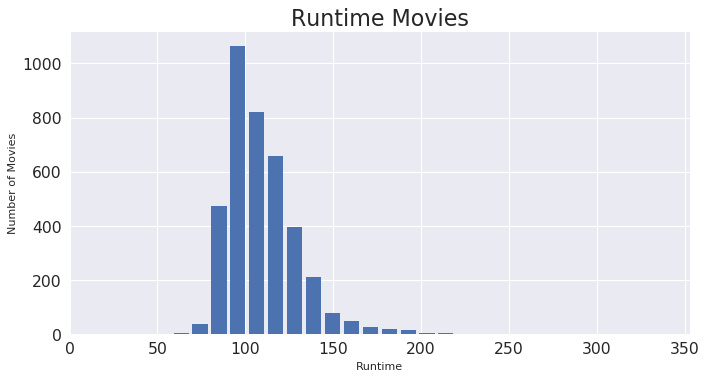

In [172]:
# explore runtime deeper

# figure size of plot
plt.figure(figsize=(10,5), dpi = 80)

# x-axis label name
plt.xlabel('Runtime', fontsize = 10)

# y-axis label name
plt.ylabel('Number of Movies', fontsize=10)

# title of the graph
plt.title('Runtime Movies', fontsize=20)

# histogram plot
plt.hist(df['runtime'], rwidth = 0.8, bins =30);

##### as show from the graph above that most movies runtime between 85 - 100 mins
##### the mean runtime is 109 approx

### Research Question 2  (Which movie had the largest and lowest budget!)

In [173]:
# get the movie with largest budget
high = df[df['budget']==df['budget'].max()]

# get the movie with lowest budget
low = df[df['budget']==df['budget'].min()]

# append largest and lowest to print them
budget_low_high = high.append([low])

# print 
budget_low_high

,budget,revenue,original_title,cast,director,runtime,genres,release_year
2244,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010
2618,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,1999
3581,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90,Comedy|Romance,2011


##### the highest budget for The Warrior's Way movie & the lowest budget for  Lost & Found movie  and Love, Wedding, Marriage movie

##### the highest budget = 425000000
##### the lowest budget = 1

### Research Question 3  (which year had the most movies making profit!)

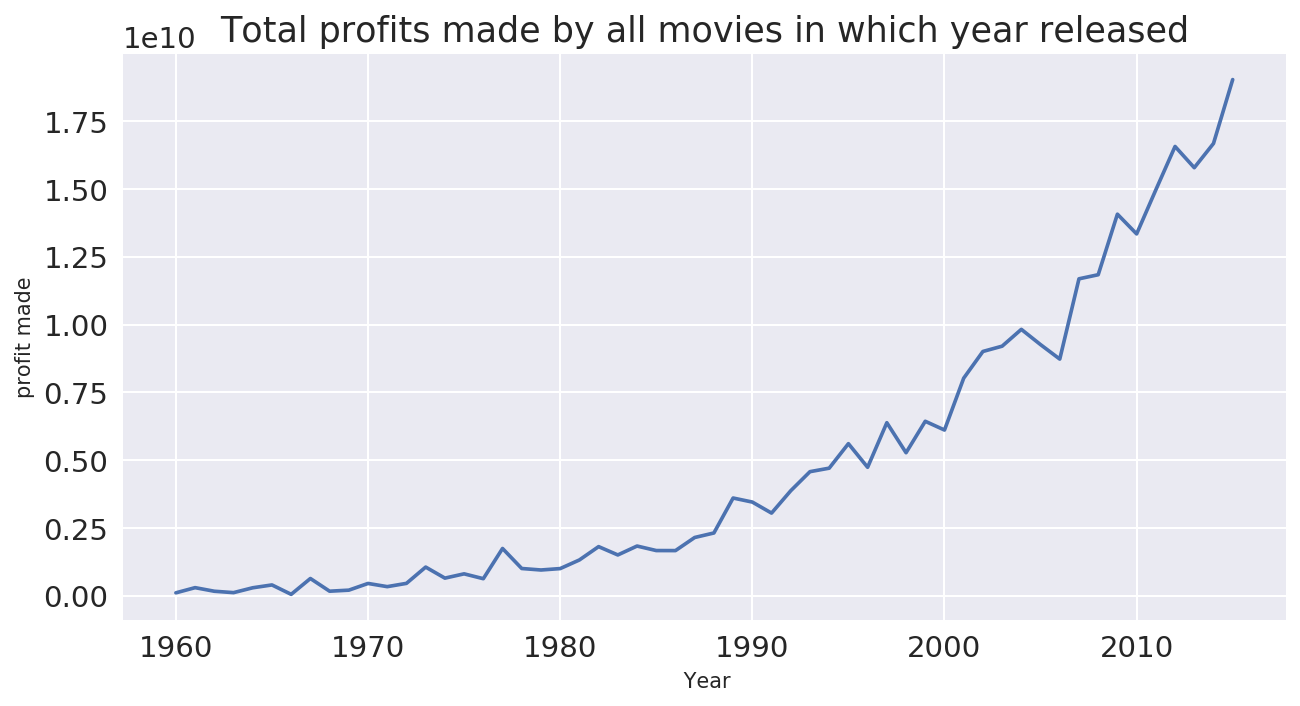

release_year
1960      108198052
1961      299083188
1962      166879846
1963      115411882
1964      294678387
1965      399281854
1966       52468689
1967      636334637
1968      168271762
1969      206862989
1970      454070023
1971      336284710
1972      457235917
1973     1057686099
1974      650582027
1975      808207270
1976      629426536
1977     1743308485
1978     1005100089
1979      950330150
1980     1002065664
1981     1320251458
1982     1811756359
1983     1505073842
1984     1833438131
1985     1666899046
1986     1665354869
1987     2148546726
1988     2314987459
1989     3603940908
1990     3454904971
1991     3048121485
1992     3873046070
1993     4575828325
1994     4704384415
1995     5608098320
1996     4736626727
1997     6380241248
1998     5274145395
1999     6433209130
2000     6110774823
2001     8022044875
2002     9007576036
2003     9202155213
2004     9822506642
2005     9259452998
2006     8726299999
2007    11686103667
2008    11836553159
2009   

In [174]:

# take the sum of revenue for each year
revenue_sum_year = df.groupby('release_year')['revenue'].sum()

# take the sum of budget for each year
budget_sum_year = df.groupby('release_year')['budget'].sum()

# calc the profit for each year
profit_year = revenue_sum_year  - budget_sum_year


# figure size(width, height)
plt.figure(figsize=(10,5), dpi = 150)

# title of a the plot
plt.title('Total profits made by all movies in which year released')

# labeling x-axis
plt.xlabel(' Year', fontsize = 10)

# labeling y-axis
plt.ylabel('profit made', fontsize = 10)


# plotting what needs to be plotted
plt.plot(profit_year)

plt.show()

print(profit_year)
print(profit_year.max())

###### as you see from the plot graph the profit is increasing throughout the years
###### the 2015 is the most year that mivies making profit

### Research Question 4  (which movie made the largest & lowest revenue!)

In [175]:

# get the movie with largest revenue
high = df[df['revenue']==df['revenue'].max()]

# get the movie with lowest revenue
low = df[df['revenue']==df['revenue'].min()]

# append them to print
budget_low_high = high.append([low])

# print
budget_low_high

,budget,revenue,original_title,cast,director,runtime,genres,release_year
1386,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009
5067,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,94,Drama|History,2003
8142,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,94,Romance|Comedy,1995


##### the Avatar movie made the largest revenue
##### the Shattered Glass	& Mallrats made the lowest revenue

### Research Question 5  (which genres make the largest revenue!)

In [176]:
# get the sum of revenue for each genre 
rev_drama = df[df['genres'].str.contains('Drama')]['revenue'].sum()
rev_comedy = df[df['genres'].str.contains('Comedy')]['revenue'].sum()
rev_thriller = df[df['genres'].str.contains('Thriller')]['revenue'].sum()
rev_action = df[df['genres'].str.contains('Action')]['revenue'].sum()
rev_adventure = df[df['genres'].str.contains('Adventure')]['revenue'].sum()
rev_romance = df[df['genres'].str.contains('Romance')]['revenue'].sum()
rev_crime = df[df['genres'].str.contains('Crime')]['revenue'].sum()
rev_science = df[df['genres'].str.contains('Science Fiction')]['revenue'].sum()
rev_horror = df[df['genres'].str.contains('Horror')]['revenue'].sum()
rev_family = df[df['genres'].str.contains('Family')]['revenue'].sum()
rev_fantasy = df[df['genres'].str.contains('Fantasy')]['revenue'].sum()
rev_mystery = df[df['genres'].str.contains('Mystery')]['revenue'].sum()
rev_animation = df[df['genres'].str.contains('Animation')]['revenue'].sum()
rev_music = df[df['genres'].str.contains('Music')]['revenue'].sum()
rev_history = df[df['genres'].str.contains('History')]['revenue'].sum()
rev_war = df[df['genres'].str.contains('War')]['revenue'].sum()
rev_western = df[df['genres'].str.contains('Western')]['revenue'].sum()
rev_documentary = df[df['genres'].str.contains('Documentary')]['revenue'].sum()
rev_foreign = df[df['genres'].str.contains('Foreign')]['revenue'].sum()
rev_tv = df[df['genres'].str.contains('TV Movie')]['revenue'].sum()


# print the sum of revenue for each genre
print('the revenue for Drama genre is : {}'.format(rev_drama))
print('the revenue for Comedy genre is : {}'.format(rev_comedy))
print('the revenue for Thriller genre is : {}'.format(rev_thriller))
print('the revenue for Action genre is : {}'.format(rev_action))
print('the revenue for Adventure genre is : {}'.format(rev_adventure))
print('the revenue for Romance genre is : {}'.format(rev_romance))
print('the revenue for Crime genre is : {}'.format(rev_crime))
print('the revenue for Science Fiction genre is : {}'.format(rev_science))
print('the revenue for Horror genre is : {}'.format(rev_horror))
print('the revenue for Family genre is : {}'.format(rev_family))
print('the revenue for Fantasy genre is : {}'.format(rev_fantasy))
print('the revenue for Mystery genre is : {}'.format(rev_mystery))
print('the revenue for Animation genre is {}'.format(rev_animation))
print('the revenue for Music genre is : {}'.format(rev_music))
print('the revenue for History genre is : {}'.format(rev_history))
print('the revenue for War genre is : {}'.format(rev_war))
print('the revenue for Western genre is : {}'.format(rev_western))
print('the revenue for Documentary genre is : {}'.format(rev_documentary))
print('the revenue for Foreign genre is : {}'.format(rev_foreign))
print('the revenue for TV Movie genre is : {}'.format(rev_tv))



# put revenues in a list
list_revenue_genres = (rev_drama, rev_comedy, rev_thriller, rev_action, rev_adventure,
     rev_romance, rev_crime, rev_science,rev_horror, rev_family, rev_fantasy,
    rev_mystery, rev_animation, rev_music, rev_history, rev_war,
    rev_western, rev_documentary, rev_foreign, rev_tv)

# print list
list_revenue_genres


the revenue for Drama genre is : 130507076351
the revenue for Comedy genre is : 132172056333
the revenue for Thriller genre is : 117679503931
the revenue for Action genre is : 169886215114
the revenue for Adventure genre is : 163500596287
the revenue for Romance genre is : 57182921352
the revenue for Crime genre is : 54777153159
the revenue for Science Fiction genre is : 85081292714
the revenue for Horror genre is : 26524253059
the revenue for Family genre is : 86340257365
the revenue for Fantasy genre is : 86420717216
the revenue for Mystery genre is : 31319746667
the revenue for Animation genre is 51681421541
the revenue for Music genre is : 11242189360
the revenue for History genre is : 10501275508
the revenue for War genre is : 12617816329
the revenue for Western genre is : 4545471891
the revenue for Documentary genre is : 754345448
the revenue for Foreign genre is : 133507449
the revenue for TV Movie genre is : 42000000


(130507076351,
 132172056333,
 117679503931,
 169886215114,
 163500596287,
 57182921352,
 54777153159,
 85081292714,
 26524253059,
 86340257365,
 86420717216,
 31319746667,
 51681421541,
 11242189360,
 10501275508,
 12617816329,
 4545471891,
 754345448,
 133507449,
 42000000)

##### as you see the Action genre is making more revenue than others genres
##### the first five genres that make more revenue
###### 1- action 
###### 2- adventure 
###### 3- comedy
###### 4- drama
###### 5- thriller


### Research Question 6  (which genres has been most filmed !)

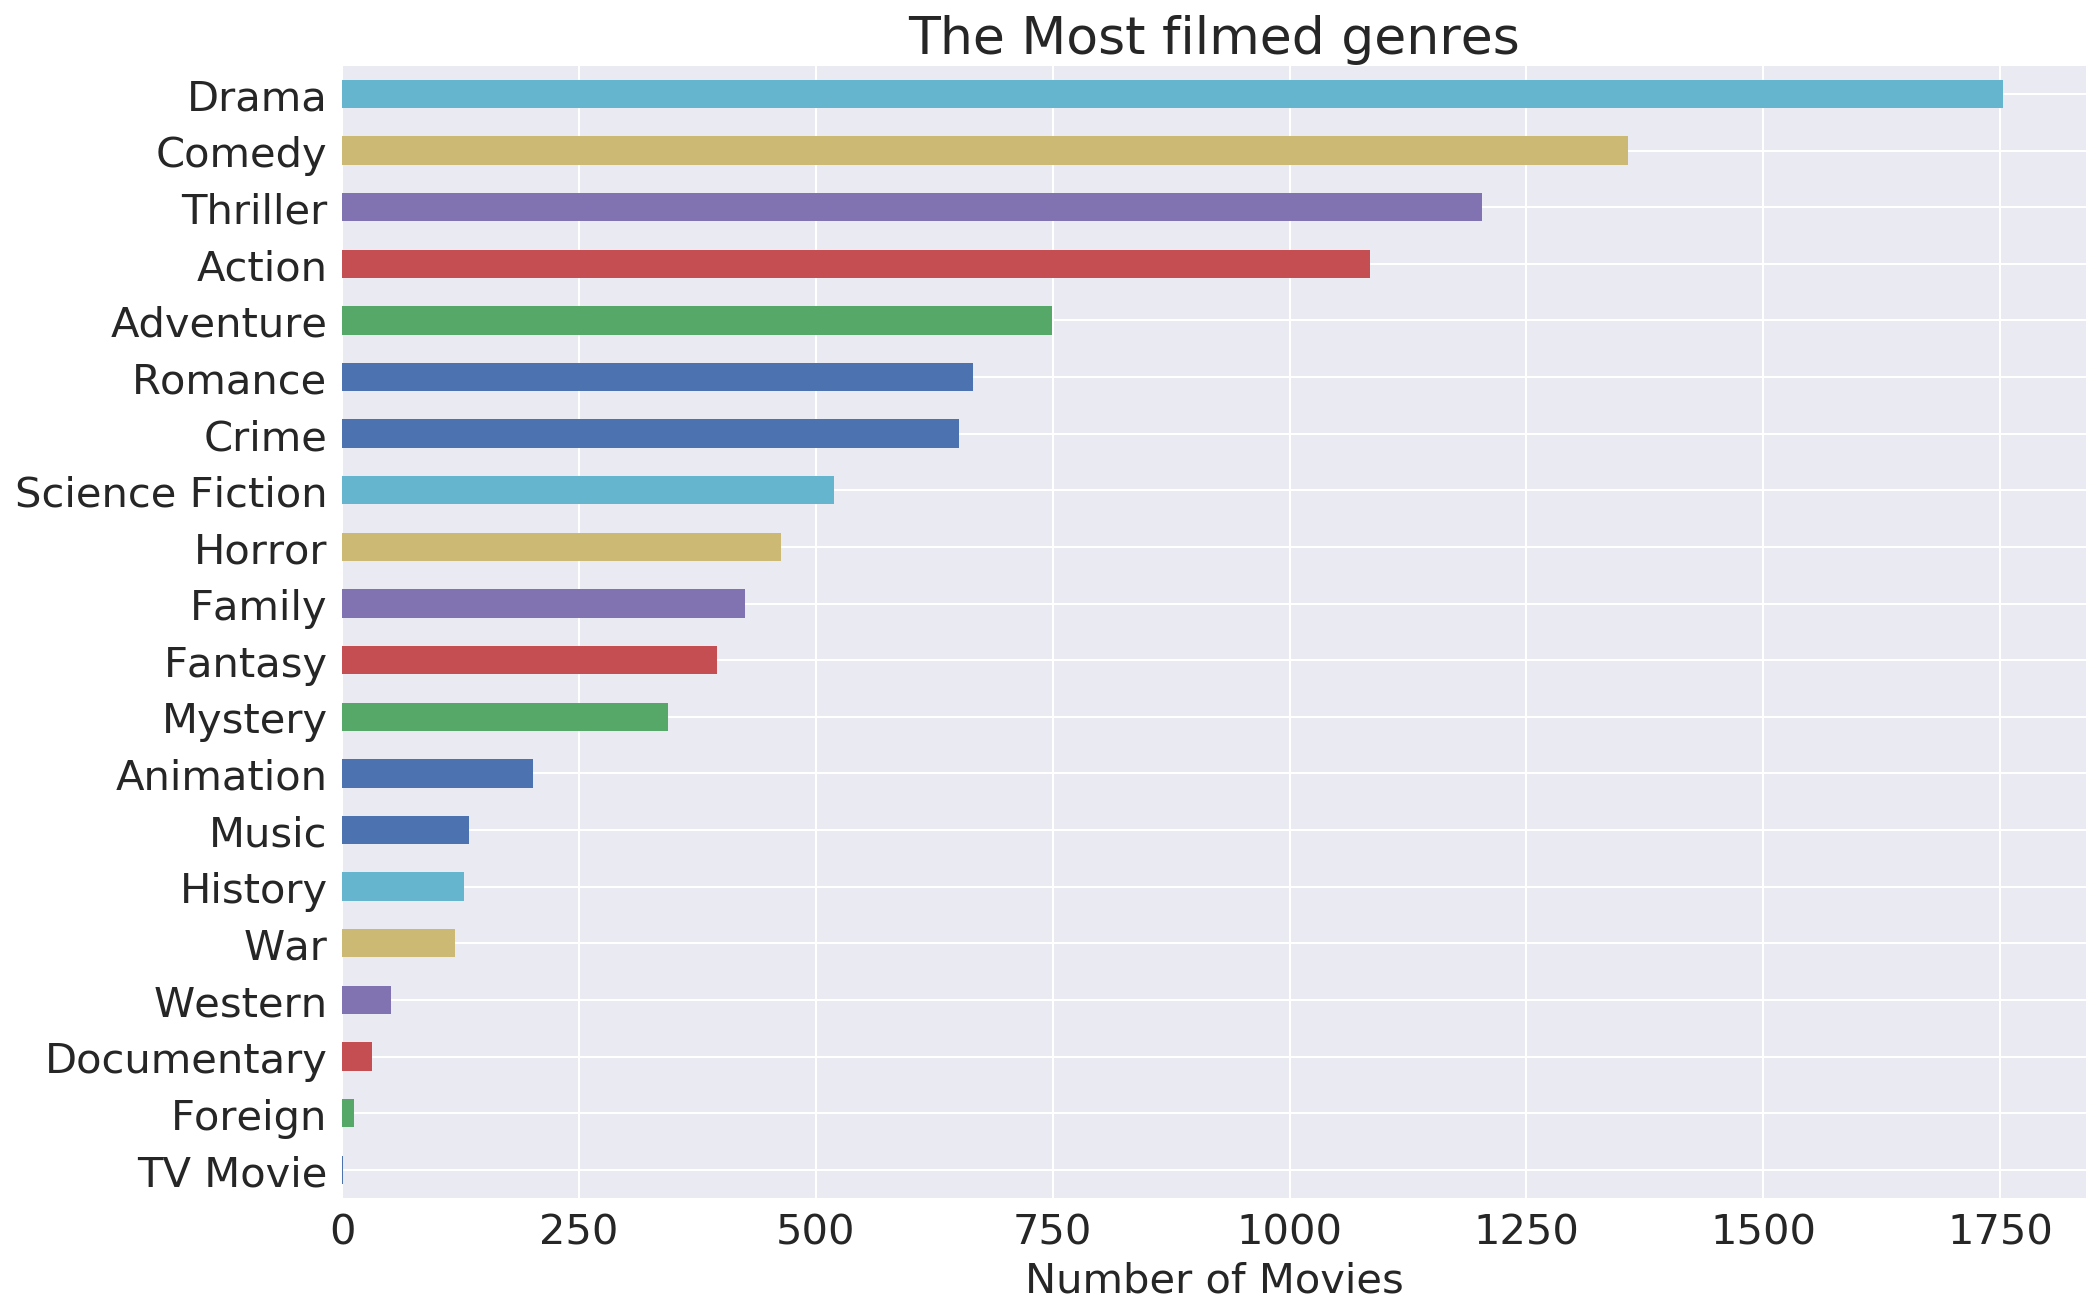

In [177]:
# use the function that i created before and store values
genres_data = extract('genres')

# sort value
genres_data.sort_values(ascending = True, inplace = True)

# fig size
plt.figure(figsize=(15,10), dpi = 150)


# giving a title
plt.title('The Most filmed genres' , fontsize = 25)

# labeling x-axis
plt.xlabel('Number of Movies', fontsize = 20)

# plot 
genres_data.plot(kind ='barh', fontsize=20);



#### the Drama genre is the most filmed 


### Research Question 7  (which cast is the most and least appeared !)

In [178]:
# use the function that i created before  and store values
cast_data = extract('cast')

#print first 5
print(cast_data.head())

# print last 5
cast_data.tail()

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
dtype: int64


Kareem Abdul-Jabbar       1
Sunny Johnson             1
Jonathan Taylor Thomas    1
Shu Qi                    1
Ryan Donowho              1
dtype: int64

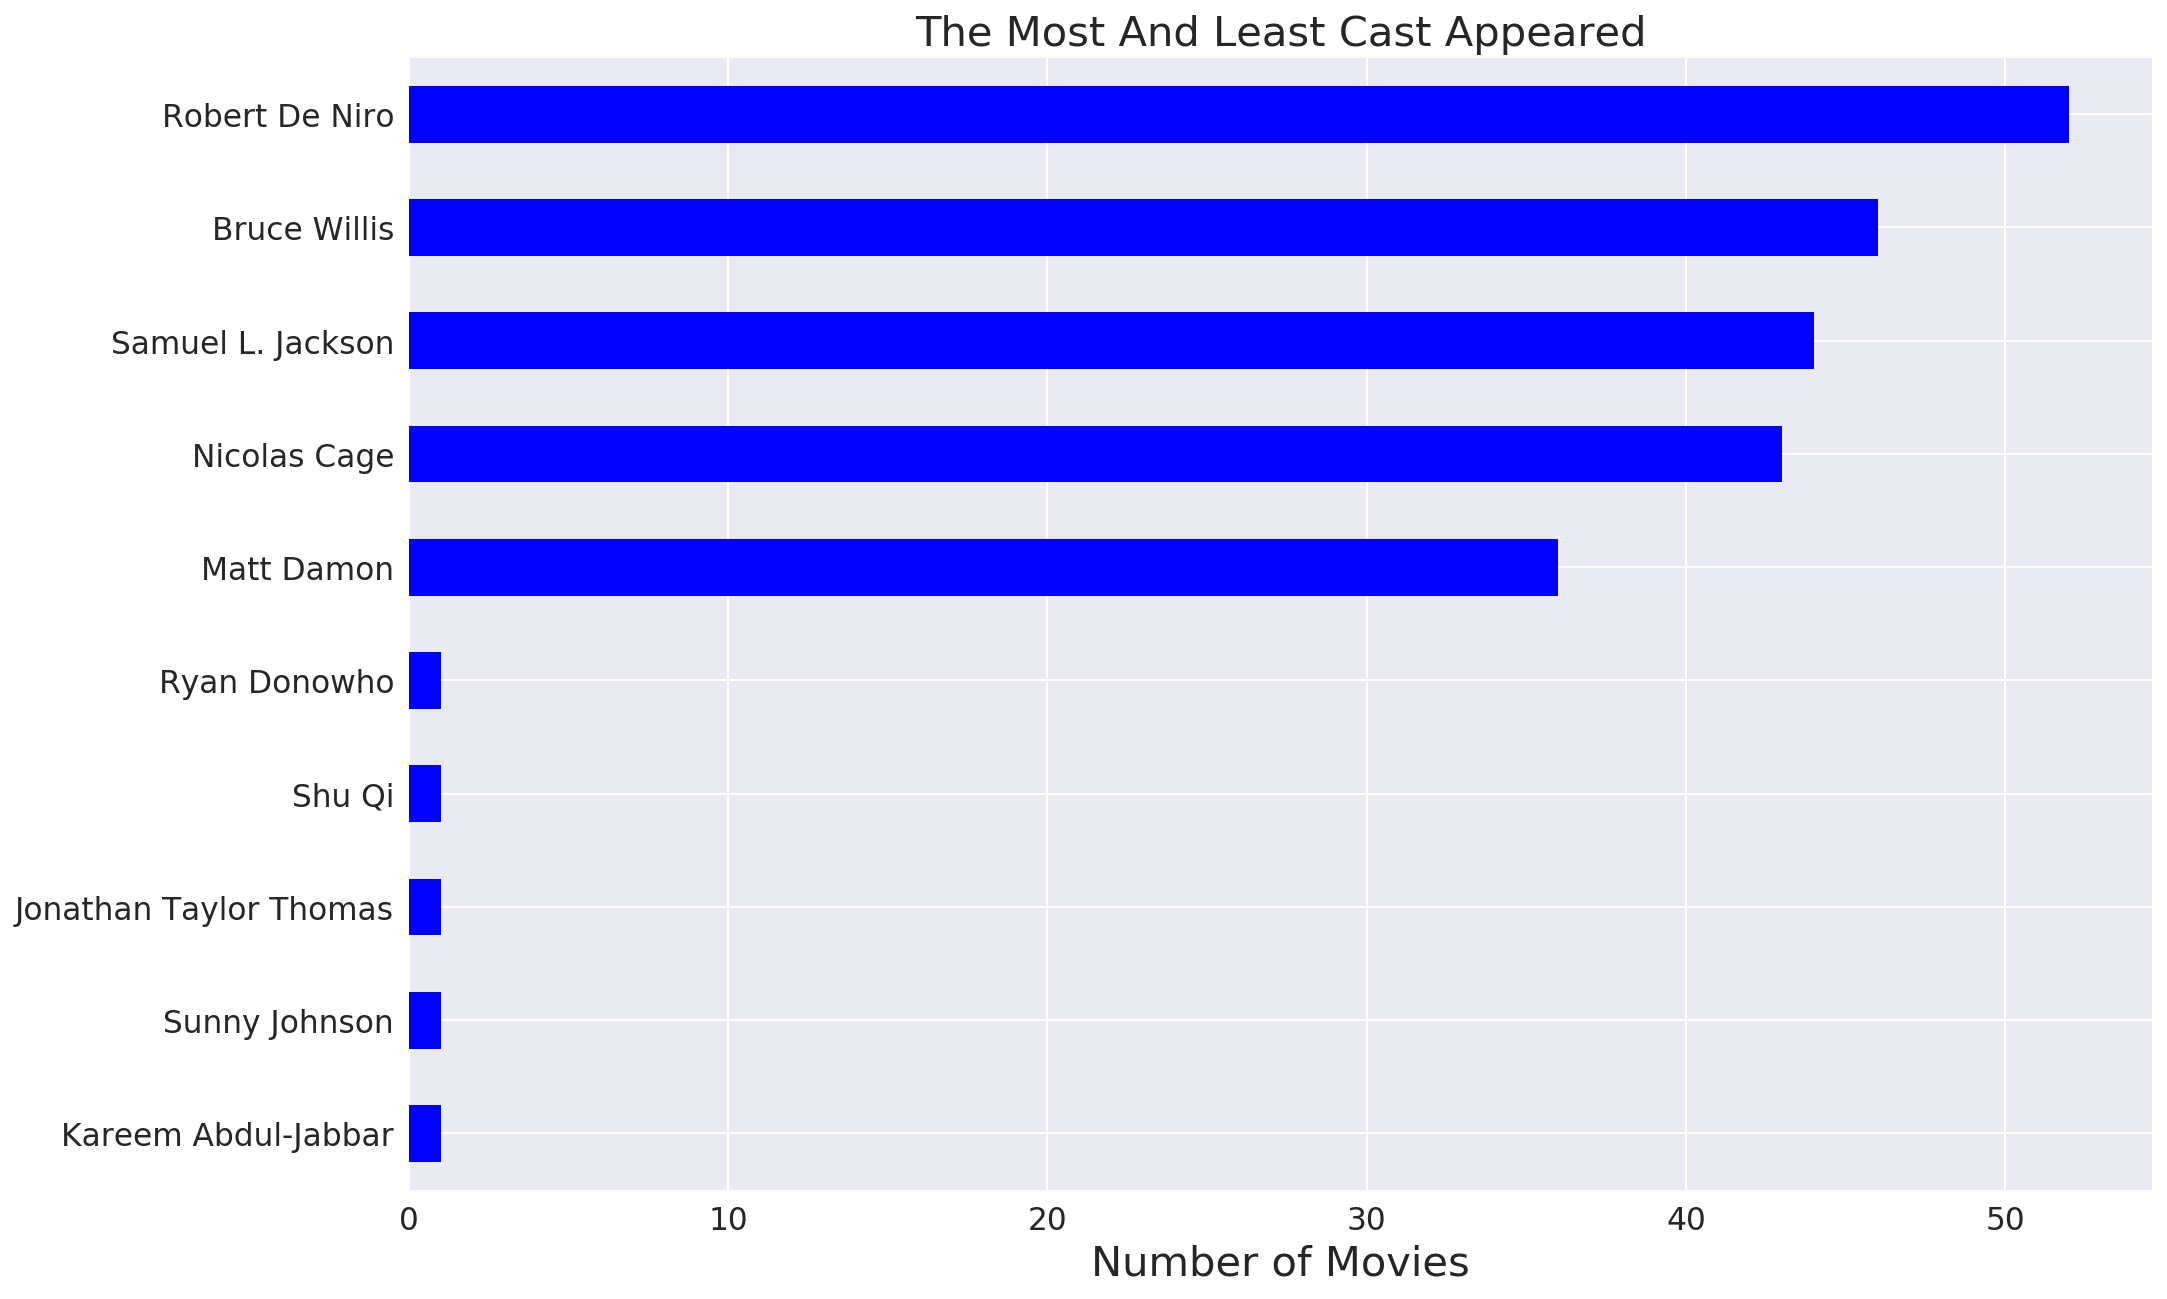

In [179]:
# get the first 5 and last 5 values
cast_data = cast_data[np.r_[0:5, -5:0]]

# sort value
cast_data.sort_values(ascending = True, inplace = True)

# fig size
plt.figure(figsize=(15,10), dpi = 150)


# giving a title
plt.title('The Most And Least Cast Appeared' , fontsize = '20')

# labeling x-axis
plt.xlabel('Number of Movies', fontsize = '20')

# plot 
cast_data.plot(kind ='barh', color='B', fontsize=15);

### Research Question 8  (which director is the most and least directed movies !)


In [180]:
# use the function that i created before  and store values
director_data = extract('director')

# print first 5 values
print(director_data.head())

# print last 5 values
director_data.tail()

Steven Spielberg    28
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Tim Burton          17
dtype: int64


Michael Radford    1
Peter Hedges       1
Julien Temple      1
David Leitch       1
Jon Lucas          1
dtype: int64

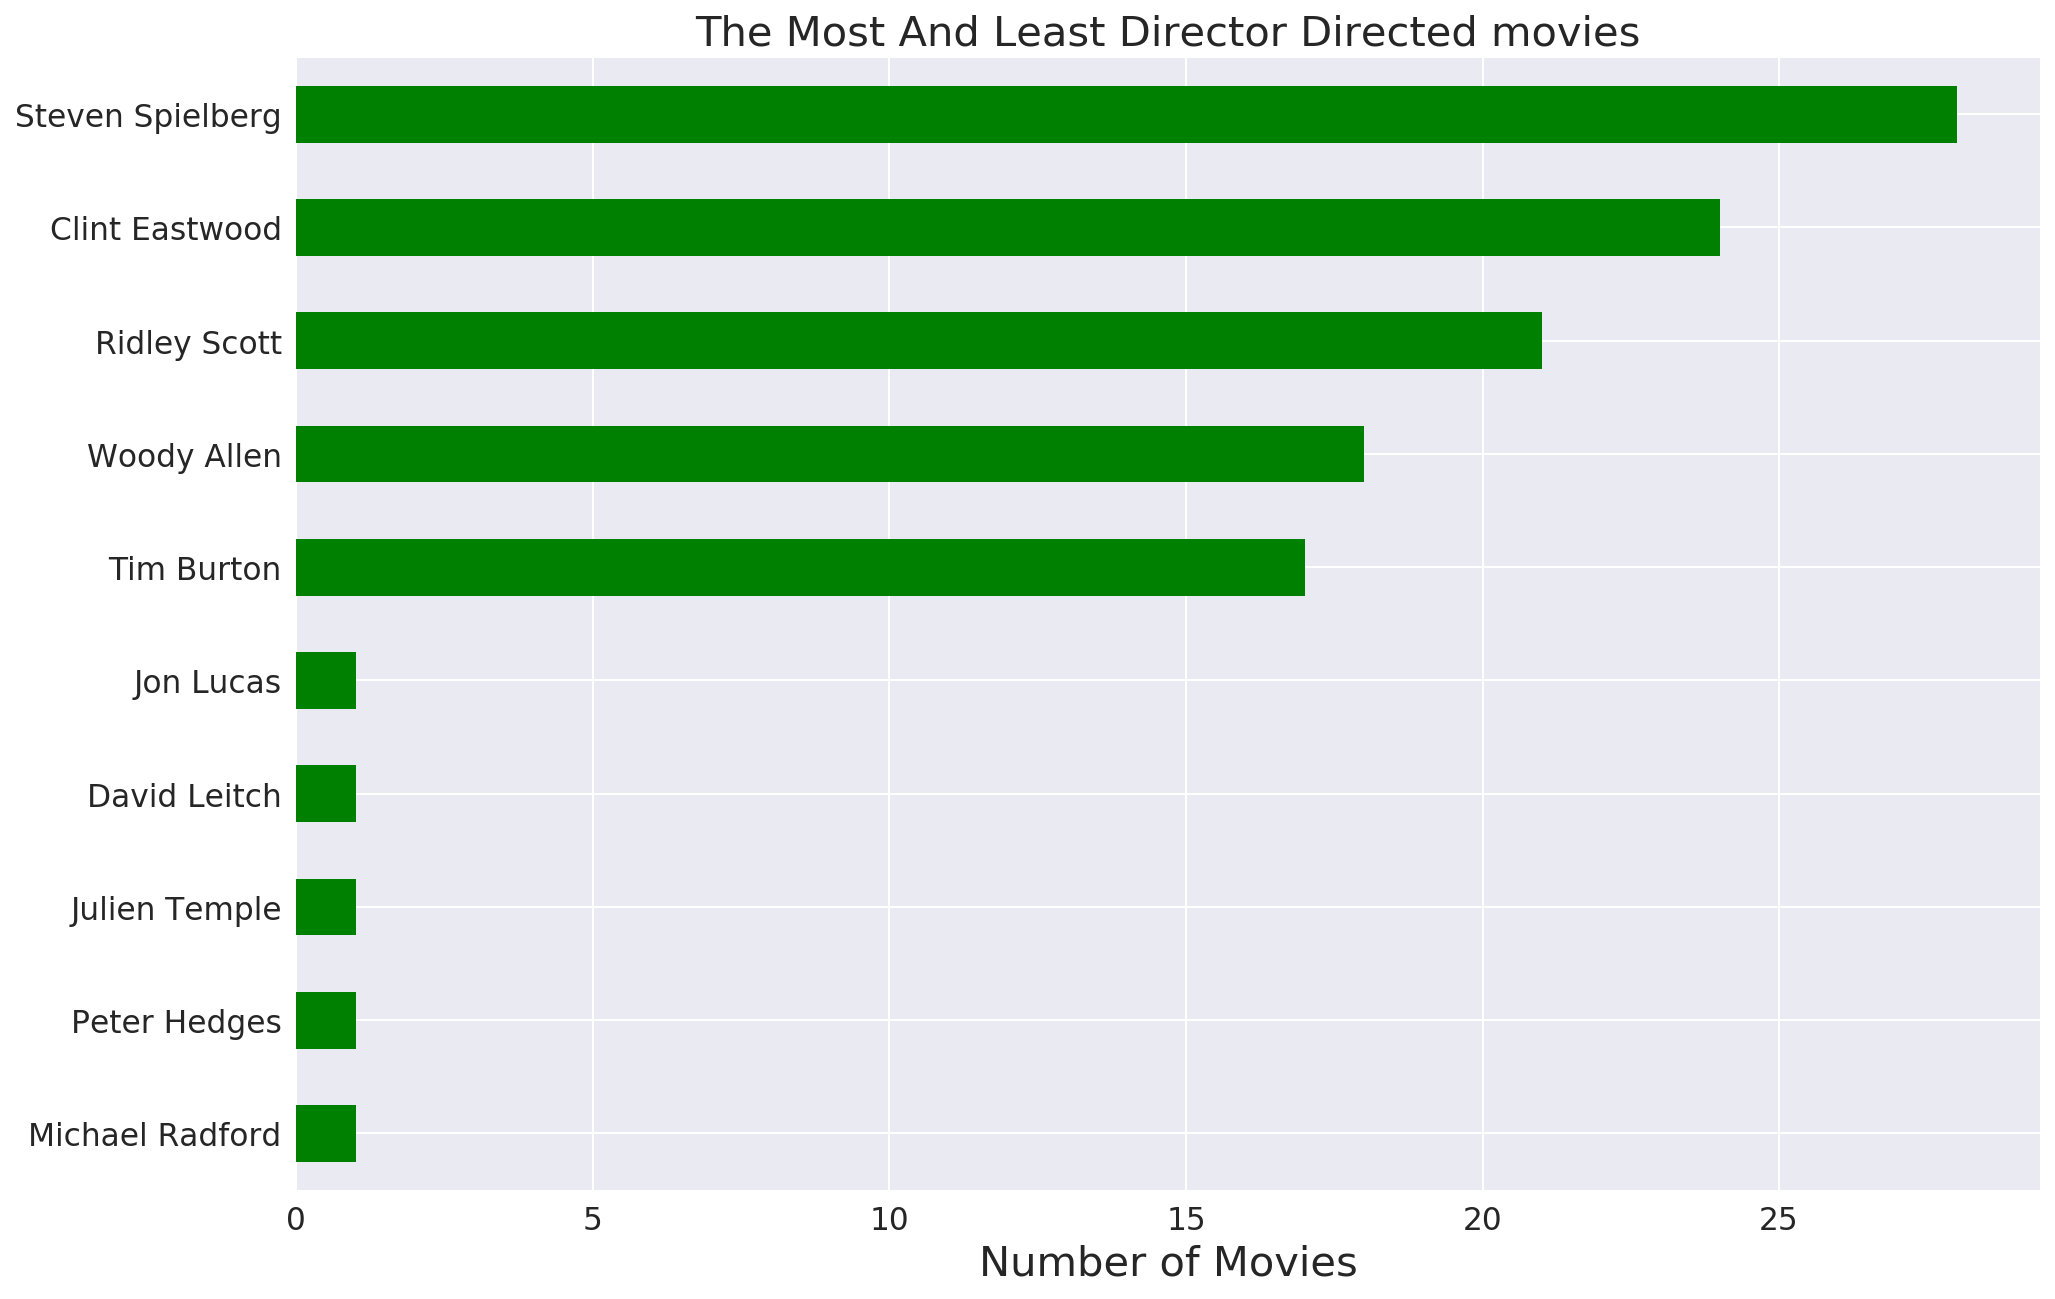

In [181]:
# get the first 5 and last 5 values
director_data = director_data[np.r_[0:5, -5:0]]

# sort value
director_data.sort_values(ascending = True, inplace = True)

# fig size
plt.figure(figsize=(15,10), dpi = 150)


# giving a title
plt.title('The Most And Least Director Directed movies' , fontsize = '20')

# labeling x-axis
plt.xlabel('Number of Movies', fontsize = '20')

# plot 
director_data.plot(kind ='barh', color='G', fontsize=15);

In [182]:
# just see the average, min, max values of all columns
df.describe()

,budget,revenue,runtime,release_year
count,3.849000e+03,3.849000e+03,3849.000000,3849.000000
mean,3.724886e+07,1.078148e+08,109.217459,2001.258249
std,4.221699e+07,1.766175e+08,19.914141,11.285642
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.367069e+07,95.000000,1995.000000
50%,2.400000e+07,4.490726e+07,106.000000,2004.000000
75%,5.000000e+07,1.243052e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


<a id='conclusions'></a>
## Conclusions

this dataset is very useful and very rich of information. As i answered the questions that i think it is important now if a company or any one else wants to produce a successful movie and gain a good profit :
from cast they they can choose one of these : Robert De Niro, Bruce Willis, Samuel L. Jackson, Nicolas Cage, Matt Damon.
from director they can choose one of these : teven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Tim Burton.
from genres they can choose one of these : Action, Adventure, Comedy, Drama, Thriller.
Also for the runtime they should make it between 85-100 minutes. 
So by doing these thing they should gain a lot of money.


All results are limited and it's not 100 percent guaranteed solution that this formula is gonna work. There are no advaned statistics were performed, the results can only be treated as indicators. Also many entries in the dataset have been deleted or removed due to missing data

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [184]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0